In [1]:
import math
import pandas as pd
import numpy as np
import random
from copy import deepcopy
import os, shutil
import matplotlib.pyplot as plt
%matplotlib inline

print('Env ready!')

Env ready!


In [3]:
data_df=pd.read_csv('CSE575-HW03-Data.csv',header=None)
data=np.asarray(data_df)
# data_df.head()
# data_df[0]
# data_df[:1]
#print(data_df[:random.randint(0,128)])

In [22]:
# min=-math.inf
# for i in range(1,128):
#     d=distance(data[0],data[i])
#     #print(d)
#     if d > min:
#         min = d
# print('min = ',min, math.sqrt(min))

In [23]:
K=[2,3,4,5,6,7,8,9]
centers=[]
# clusters=[]
# dist=[]

In [99]:
def distance(x,y):
    return np.sqrt(np.sum(np.square(x-y)))
    #return np.sum(np.square(x-y))
    #return np.sum(np.abs(x-y))

In [100]:
distance(data[0],data[100])

24.866624668619583

In [101]:
def clustering(data, centers,k):
    clusters = [[] for i in range(k)]
    dist = [[] for i in range(k)]
    for s in range(128):
        cluster = s
        d = math.inf
        for c in range(k):
#             if k==4:
#                 print(c,s)
#                 print(centers[c])
            d_ = distance(centers[c],data[s])
            if d_ < d:
                d = d_
                cluster = c
        clusters[cluster].append(s)
        dist[cluster].append(d)
    return clusters,dist

In [102]:
def update_centers(clusters,dist,centers,k):
    new_centers=[]
    for c in range(k):
        new_center = [0]*13
        for i in clusters[c]:
            new_center += data[i]
        if len(clusters[c])!=0:
            new_center = new_center/len(clusters[c])
        new_centers.append(new_center)
    return new_centers

In [103]:
def plotClusters(clusters,i,k):
    colors=['c*','yv','rx','k*','m.','r+','go','b.','y_','g.']
    plt.clf()
    for c in range(k):
        x_ = [x[0] for x in data[clusters[c]]]
        y_ = [x[1] for x in data[clusters[c]]]
#         if k == 9:
#             print(c)
        plt.plot(x_,y_,colors[c])
    plt.savefig('alt_output_graphs/'+str(k)+'_'+str(i)+'_'+str(c)+'.png')

In [104]:
def clearOuputFolder(path):
    folder = path
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))



In [105]:
def plot_cost(cost,i,k):
    plt.clf()
    #plt.ylim(30,100)
    plt.plot(range(1,i+1), cost, color='red')
    plt.savefig('alt_cost_graphs\cost_'+str(k)+'_'+str(i)+'.png')

Cluster:  2
52 89 
Cluster:  3
97 26 31 
Cluster:  4
113 46 67 58 
Cluster:  5
114 93 34 19 15 
Cluster:  6
62 85 80 72 40 9 
Cluster:  7
74 4 8 21 57 88 78 
Cluster:  8
59 12 75 117 25 77 28 47 
Cluster:  9
50 38 7 54 24 104 17 6 5 


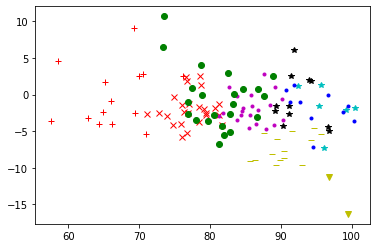

In [106]:
clearOuputFolder('alt_output_graphs/')
clearOuputFolder('alt_cost_graphs/')
cost_func=[]
ind_=[]
for k in K:    
    print('Cluster: ',k)
    centers=[]
    for i in range(k):
        ind = random.randint(0,127)
        while ind in ind_:
            ind = random.randint(0,127)
        ind_.append(ind)
        centers.append(data[ind])
        print(ind, end=' ')
    print('')
    prev_centers=[]
    i=0
    flag = True
    cost=[]
    while flag:
        i+=1
        prev_centers = deepcopy(centers)
        clusters,dist = clustering(data,centers,k)
        centers = update_centers(clusters,dist,centers,k)
        #cost.append(sum([sum(d)/len(d) if len(d)!=0 else 0 for d in dist]))
        cost.append(sum([sum(d) for d in dist]))
        plot_cost(cost,i,k)
        flag = False
        plotClusters(clusters,i,k)
        for c in range(k):
            bool_ = centers[c] == prev_centers[c]
            if type(bool_) != bool:
                if 0 in bool_:
                    flag = True
    #cost_func.append(sum([sum(d)/len(d) if len(d)!=0 else 0 for d in dist]))
    cost_func.append(cost.pop())

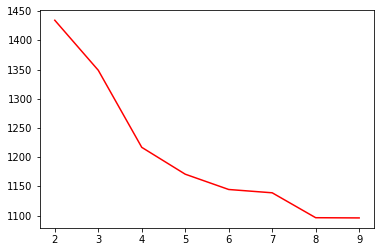

In [107]:
plt.clf()
#plt.ylim(2000,5000)
plt.plot(K,cost_func,color='red')
plt.savefig('alt_cost_func_vs_k.png')

In [365]:
# d_ = []
# for d in dist:
#     #print('{0:.2f}'.format(sum(d)/len(d)),end='\t')
#     d_.append(float('{0:.2f}'.format(sum(d)/len(d))))
# print(d_)

In [204]:
#centers_copy=deepcopy(centers)

#k=4
# centers=deepcopy(centers_copy)
# prev_centers=[]
# i=0
# flag = True
# #for i in range(10):
# while flag:
#     print('Iteration: ', i)
#     prev_centers = deepcopy(centers)
#     #print('Previous: ', prev_centers)
#     clusters,dist = clustering(data, centers)
#     centers = update_centers(clusters,dist,centers)
#     flag = False
#     plotClusters(clusters,i,k)
#     for c in range(k):
#         bool_ = centers[c] == prev_centers[c]
# #         print(c, bool_)
#         if 0 in bool_:
#             flag = True
#     #print('Centers = ',centers)
#     #print('Clusters = ',clusters)
#     #print('Dist = ', dist)
# #     print(prev_centers)
#     i+=1



#         for d in dist:
#             d1='{0:.2f}'.format(sum(d)/len(d))
#             print(d1)
#         print('')



#             bool_list = list(bool_)
#             bool_list.append(True)
#             if 0 in list(bool_):
#             if 0 in bool_list: